# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [4]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [5]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64


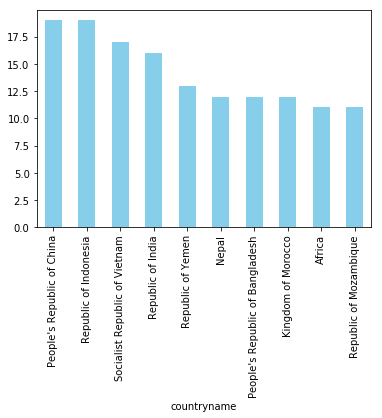

In [63]:
# 1. Find the 10 countries with most projects

import matplotlib.pyplot as plt

# Read in the json file
wb_projects = pd.read_json('data/world_bank_projects.json')

# Group the file by country name and count the number of times that each country name appears
most_projects = wb_projects.groupby('countryname')['countryname'].count()

# Sort the countries from most to least frequent
most_projects = most_projects.sort_values(ascending=False)

# Print the top 10 countries by count
top_countries = most_projects[0:10]
print(top_countries)

# Graph the top 10 countries by count
top_countries.plot(kind='bar', color='skyblue')
plt.show()

name
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64


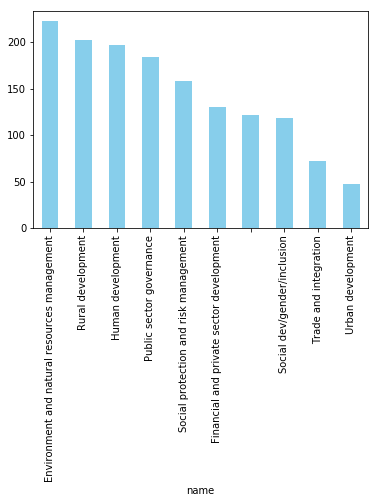

In [65]:
# 2. Find the top 10 major project themes (using column 'mjtheme_namecode')

# Open the json file
with open('data/world_bank_projects.json') as file:
    data = json.load(file)

# Pull out the project themes
wb_themes = json_normalize(data, 'mjtheme_namecode')

# Group the project themes by name and count the number of times that each appears
grouped_themes = wb_themes.groupby('name')['name'].count()

# Sort the themes from most to least frequent
grouped_themes = grouped_themes.sort_values(ascending=False)

# Print the top 10 themes by count
top_themes = grouped_themes[0:10]
print(top_themes)

# Graph the top 10 themes by count
top_themes.plot(kind='bar', color='skyblue')
plt.show()

project_theme_type
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: project_theme_type, dtype: int64


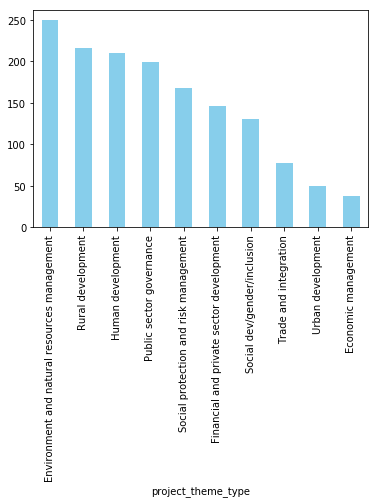

In [70]:
# 3. In 2. above you will notice that some entries have only the code and the name 
# is missing. Create a dataframe with the missing names filled in.

# Create a copy of the wb_themes DataFrame called 'codes'
codes = wb_themes.copy()

# Subset codes to only those where the nemae is not blank, and drop any duplicates.
# This will result in a list of unique code-name pairs.
codes = codes[codes['name'] != '']
codes = codes.drop_duplicates()

# Merge the codes dataframe with the wb_themes dataframe. This will pull in the
# name for each code present in wb_themes, even observations that have a blank name.
filled_themes = pd.merge(left=wb_themes, right=codes, on='code', suffixes=['_original', '_fixed'])

# Subset the dataframe to only the column of filled-in names
filled_themes = filled_themes[['name_fixed']]

# Rename the column to 'project_theme_type'
filled_themes.columns = ['project_theme_type']

# Group the project themes by name and count the number of times that each appears
grouped_filled = filled_themes.groupby('project_theme_type')['project_theme_type'].count()

# Sort the themes from most to least frequent
grouped_filled = grouped_filled.sort_values(ascending=False)

# Print the top 10 themes by count
top_themes_filled = grouped_filled[0:10]
print(top_themes_filled)

# Graph the top 10 themes by count
top_themes_filled.plot(kind='bar', color='skyblue')
plt.show()